In [1]:
from __future__ import division
import numpy as np
import pickle
import Cosmology as Cosmo
import matplotlib.pyplot as plt

In [2]:
params  = Cosmo.Planck2015
tag     = params[0]['name']
field   = 'tt'
nl      = True
div     = False

In [3]:
thetaFWHMarcmin = 1. #beam FWHM
noiseUkArcmin   = 1. #eval(sys.argv[1]) #Noise level in uKarcmin
l_max_T         = 4000
l_max_P         = 4000
l_min           = 50
L_max           = 6000 #for l integration
L_min           = 1
TCMB            = 2.7255e6
div             = False #divide EB by factor of 2.5
exp             = 'CMB-S4'

len_ang         = 400
len_l           = 4608

redshifts       = [10,25]


if l_max_T!=l_max_P:
    lmax='mixedlmax_%d_%d'%(l_max_T,l_max_P)
else:
    lmax=str(l_max_T)

if nl:
  nl_='_nl'
else:
  nl_=''

if div:
    print 'Dividing EB by factor 2.5!'
    no_div='div25'
else:
    no_div='nodiv'

biaspath = '/home/nessa/Documents/Projects/LensingBispectrum/CMB-nonlinear/biasResults/Cross/kkl/lmin%d_lmax%d_noise%d_theta%d/'%(l_min,l_max_T,noiseUkArcmin,thetaFWHMarcmin*10)
ALpath   = './outputs/N0files/'
outputpath = '/home/nessa/Documents/Projects/LensingBispectrum/CMB-nonlinear/outputs/CrossBias/kkl/'
plotpath = '/home/nessa/Documents/Projects/LensingBispectrum/CMB-nonlinear/biasResults/Cross/plots/'

In [4]:
ellpath="/home/nessa/Documents/Projects/LensingBispectrum/CMB-nonlinear/outputs/ells/"
L,l,theta = pickle.load(open(ellpath+'ell_ang_full_Lmin1_Lmax3000_lmin1_lmax8000_lenL120_lenl140_lenang120_1e-04.pkl','r'))
path='/home/nessa/Documents/Projects/LensingBispectrum/CMB-nonlinear/outputs/power_spectra/'
noisepath='/home/nessa/Documents/Projects/LensingBispectrum/CMB-nonlinear/outputs/noise_curves/'

In [5]:
from scipy.interpolate import interp1d
bias=[]
cls=[]
clsauto=[]
LL = np.arange(100,2999)
for redshift in redshifts:
    Ls, bias_ = pickle.load(open(biaspath+'Totbias_%d_%d_%d_new.pkl'%(len_ang,len_l,redshift)))
    bias_    = interp1d(Ls,bias_,kind='cubic')
    filename = ALpath+'%s_N0_%s_%d_%d%d_%s%s.pkl'%(tag,lmax,l_min,10*noiseUkArcmin,10*thetaFWHMarcmin,no_div,nl_)
    LA,NL_KK = pickle.load(open(filename,'r'))
    AL       = np.interp(LL,LA,NL_KK['tt'])
    bias     +=[1/2.*LL**2*AL*bias_(LL)]
    ll,_,_   =pickle.load(open(ellpath+'ell_ang_full_Lmin1_Lmax8000_lmin1_lmax8000_lenL120_lenl120_lenang120_1e-04.pkl','r'))
    clauto   =np.load(path+'CL_ll_delta%d_full_Planck2015_Lmin1-Lmax8000_halofit.npy'%redshift)
    clsauto +=[np.interp(LL,ll,clauto)]
    cl       = np.load(path+'CL_kl_delta%d_full_Planck2015_Lmin1-Lmax8000_halofit.npy'%redshift)
    cls      +=[np.interp(LL,ll,cl)]    
print biaspath
pickle.dump([LL,bias,cls],open(outputpath+'N32bias_%s_%d_%d_%d_%d.pkl'%(tag,thetaFWHMarcmin,noiseUkArcmin,l_min,l_max_T),'w'))

/home/nessa/Documents/Projects/LensingBispectrum/CMB-nonlinear/biasResults/Cross/kkl/lmin50_lmax4000_noise1_theta10/


(0, 10)
tot bias/noise 2.18618417447
(1, 25)
tot bias/noise 1.59773630761


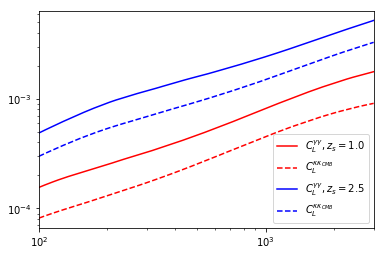

In [6]:
#plt.style.use('classic')
colors=['r','b','g','c','orange','black']
plt.figure()
for ii in range(len(redshifts)):
    print(ii, redshifts[ii])
    plt.loglog(LL,LL**2*cls[ii],c=colors[ii],label='$C_L^{\gamma\gamma}, z_s=$%.1f'%(redshifts[ii]/10.))
    plt.loglog(LL,LL**2*clsauto[ii],c=colors[ii],ls='--',label='$ C_L^{\kappa\kappa_{CMB}}$')
    plt.xlim(100,3000)
    plt.legend()
    print 'tot bias/noise', np.sqrt(np.sum((bias[ii]/cls[ii])**2))
    

<function matplotlib.pyplot.show>

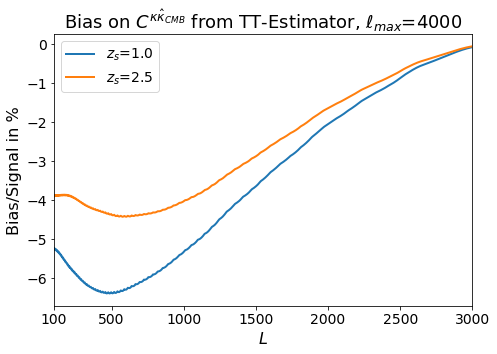

In [10]:
#plt.style.use(['seaborn-colorblind','paper'])
plt.figure(figsize=(7.5,5))
ii=0
for ii in np.arange(len(redshifts)):
    plt.plot(LL,bias[ii]/cls[ii]*100,lw=2,label='$z_s$=%.1f'%(redshifts[ii]/10.))
plt.xlabel('$L$',fontsize=16)
plt.title('Bias on $C^{\kappa\hat{\kappa}_{CMB}}$ from TT-Estimator, $\ell_{max}$=%d'%l_max_T,fontsize=18)
plt.ylabel('Bias/Signal in %',fontsize=16)
plt.legend(fontsize=14)
plt.xlim(100,3000)
plt.xticks([100,500,1000,1500,2000,2500,3000],fontsize=14)
plt.yticks(fontsize=14)
plt.savefig(plotpath+'Bias_over_Signal_kkl_TT_lmax%d.pdf'%l_max_T,bbox_inches='tight')
plt.show

In [12]:
50*0.25


12.5